# Model optimization / futher model versions


- Linear Regression
- Polynomial Regression
- K-Nearest-Neighbors Regression
- Regression Trees / Decision Tree Regresison
- Support Vector Regression
- Logistic Regression
- Naive Bayes Classification

<br><br>
- Don't forget the feature selection!!!

# 0. Import Requirements

In [4222]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# 1. Load and Split data

In [4223]:
train_data = pd.read_csv('new_traindata.csv')
test_data = pd.read_csv('new_testdata.csv')

In [4224]:
train_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,154,2.0,0,6,0,0,1,1,0.587133,0.161118,991,0,5312
1,685,4.0,1,11,0,6,1,2,0.324492,0.114392,601,0,5445
2,368,1.0,1,1,0,1,1,1,0.126275,0.198321,549,0,2236
3,472,2.0,1,4,1,0,0,1,0.614925,0.172953,740,0,6370
4,442,1.0,1,3,0,1,0,2,0.505046,0.089160,773,1,7836


In [4225]:
test_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,299,4.0,0,10,0,2,1,2,0.472846,0.120161,605,0,3894
1,458,2.0,1,4,0,0,1,1,0.427513,0.206779,518,0,5936
2,687,4.0,1,11,0,1,0,1,0.326383,0.139545,766,0,5629
3,346,4.0,0,12,0,2,1,1,0.270196,0.057694,739,0,3310
4,291,4.0,0,10,0,1,1,2,0.522721,0.093734,463,0,4748


In [4226]:
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1:]

test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1:]

# train_features
# train_labels
# test_features
# test_labels

# 3. Model building

### 3.1. Polynomial Regression

In [4227]:
poly_model = make_pipeline(PolynomialFeatures(degree=2, # 2 = best value
                                              interaction_only=False, # False = default = best value
                                              include_bias=True, # True/False = no significant change
                                              order='C'), # C/F = no significant change
                           linear_model.LinearRegression()
                           )

poly_model.fit(train_features, train_labels)

poly_prediction = poly_model.predict(test_features)

In [4228]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, poly_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",poly_model.score(test_features, test_labels))

MAE: 804.847
R^2 value of the model:  0.4211081632942363


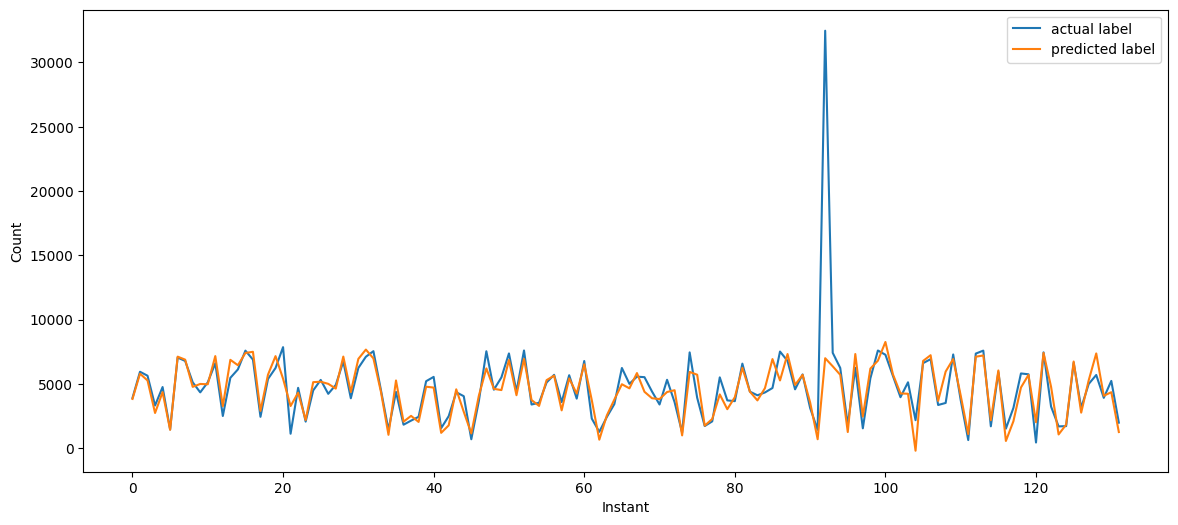

In [4229]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(poly_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

In [4230]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
single_poly_prediction = poly_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ", single_poly_prediction)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", single_poly_prediction - test_labels.iloc[0])

Predict label for following example:
instant            299.000000
season               4.000000
yr                   0.000000
mnth                10.000000
holiday              0.000000
weekday              2.000000
workingday           1.000000
weathersit           2.000000
atemp                0.472846
windspeed            0.120161
leaflets           605.000000
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  [3822.07580845]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -71.924192
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [4231]:
print(round(poly_prediction[:10] - test_labels.iloc[0:10])*100000, 2)

          cnt
0  -7200000.0
1 -15200000.0
2 -37000000.0
3 -58000000.0
4 -39400000.0
5  -2900000.0
6   7300000.0
7  10100000.0
8 -35700000.0
9  65600000.0 2


### 3.2. K-Nearest-neighbours Regression

In [4232]:
knn_model = KNeighborsRegressor(n_neighbors=3, # best value
                                weights='uniform', # default
                                algorithm='auto', # default
                                leaf_size=30, # default
                                p=10, # best value
                                metric='minkowski', # default
                                metric_params=None, # default,
                                n_jobs=None # default
                                )

knn_model.fit(train_features, train_labels)

knn_prediction = knn_model.predict(test_features)

In [4233]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, knn_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",knn_model.score(test_features, test_labels))

MAE: 989.730
R^2 value of the model:  0.4003931880965578


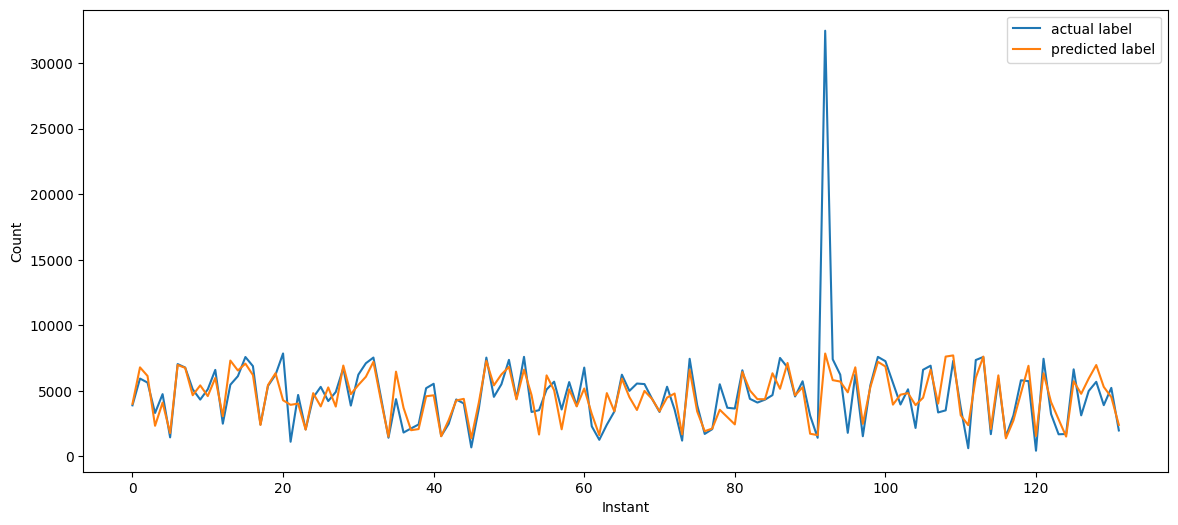

In [4234]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(knn_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 3.3. Regression Tree / Decision Tree Regression

In [4235]:
tree_model = DecisionTreeRegressor(criterion='absolute_error', # best value
                                   splitter='best', # best value
                                   max_depth=5, # best value
                                   min_samples_split=2, # default
                                   min_samples_leaf=5, # best value
                                   min_weight_fraction_leaf=0.0, # default
                                   max_features=None, # default
                                   random_state=None, # default
                                   max_leaf_nodes=None, # default
                                   min_impurity_decrease= 0.0, # default,
                                   ccp_alpha=0.0 # default
                                   )

tree_model.fit(train_features, train_labels)

tree_prediction = tree_model.predict(test_features)

In [4236]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, tree_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",tree_model.score(test_features, test_labels))

MAE: 821.485
R^2 value of the model:  0.44157300145332945


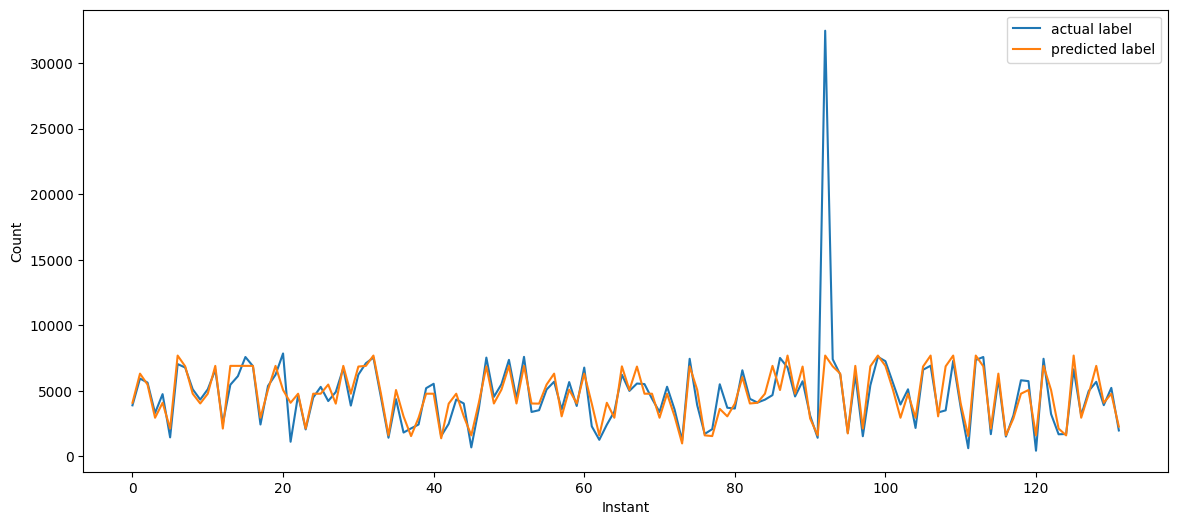

In [4237]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(tree_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 3.4. Support Vector Regression

In [4238]:
svr_model = SVR(kernel='linear')
svr_model.fit(train_features, train_labels)

svr_prediction = svr_model.predict(test_features)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4239]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, svr_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",svr_model.score(test_features, test_labels))

MAE: 1294.168
R^2 value of the model:  0.2749600648141377


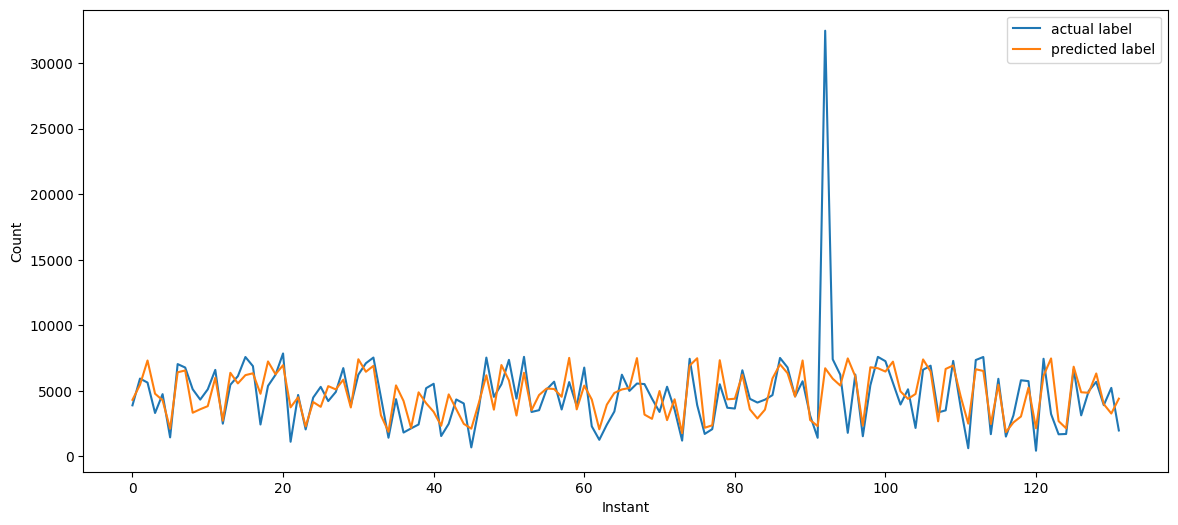

In [4240]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(svr_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 3.5. Logistic Regression

In [4241]:
log_model = linear_model.LogisticRegression(random_state=0)
log_model.fit(train_features, train_labels)

log_prediction = log_model.predict(test_features)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4242]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, log_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",log_model.score(test_features, test_labels))

MAE: 1521.803
R^2 value of the model:  0.0


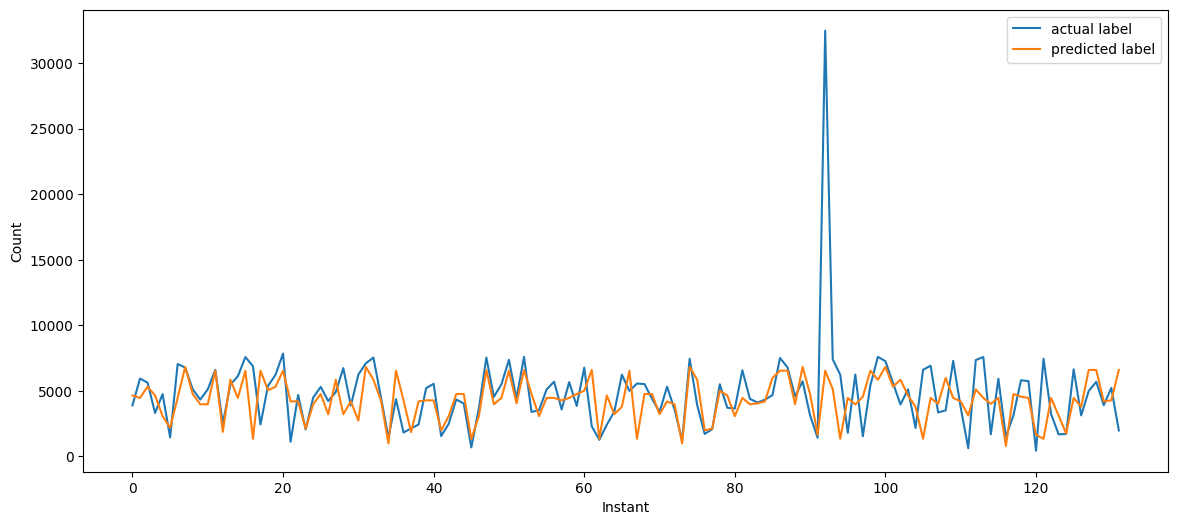

In [4243]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(log_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 3.6. Naive Bayes Classification

In [4244]:
knnClass_model = KNeighborsClassifier(n_neighbors=10)
knnClass_model.fit(train_features, train_labels)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [4245]:
knnClass_model.score(test_features, test_labels)

0.0